In [17]:
import matplotlib.pyplot as plt
import numpy as np
import requests
from PIL import Image
from matplotlib.pyplot import imshow
from skimage.morphology import erosion, dilation, opening, closing
from skimage.filters import threshold_otsu, threshold_niblack, threshold_sauvola
from skimage.measure import regionprops_table, label
import pandas as pd

In [22]:
test_image = np.array(Image.open("6_93_mCherry.tiff"))[500:700,:]

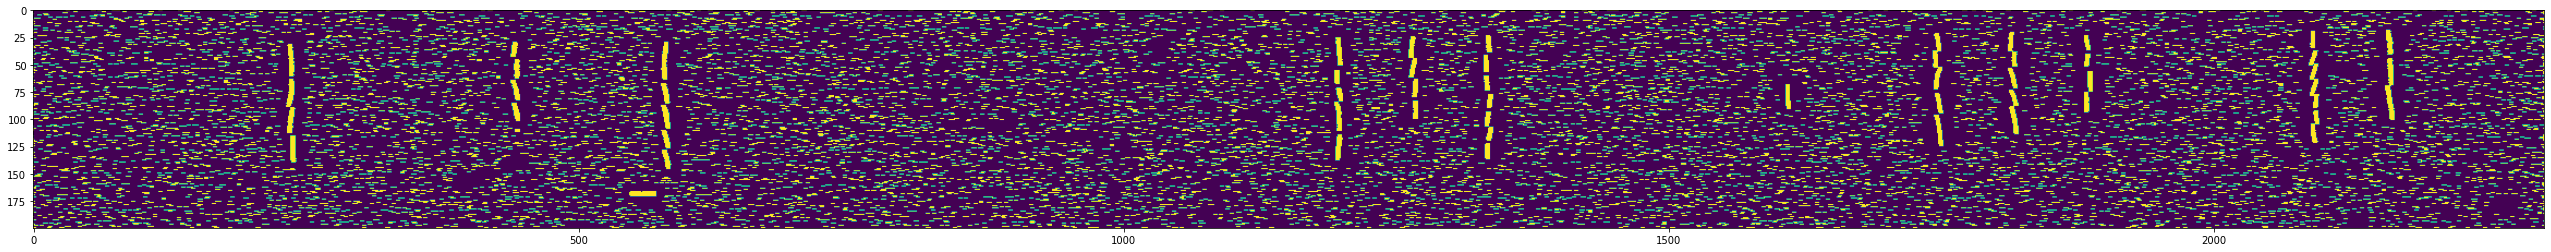

In [107]:
plt.figure(figsize=(45,25))
niblack_thresholded = threshold_niblack(test_image,k=0.001,window_size=7)
niblack_binary = test_image > niblack_thresholded
niblack_binary_opened = opening(niblack_binary,selem=np.ones((1,4)))
plt.imshow(niblack_binary_opened)
final_seg = niblack_binary_opened

In [109]:
cells_labeled = label(niblack_binary_opened)


In [139]:
cell_data = regionprops_table(label_image = cells_labeled, 
                              intensity_image = test_image, properties=[
                                  "label", "area", "mean_intensity", 
                                  "major_axis_length","minor_axis_length", "centroid", "eccentricity"])
cell_data = pd.DataFrame(cell_data)
cell_data = cell_data[cell_data["area"] > 50]
segmented_cell_image = np.zeros(cells_labeled.shape)
for x in range(len(cell_data)):
    current_val = cell_data["label"].iloc[x]
    current_image = (cells_labeled == current_val)
    segmented_cell_image = segmented_cell_image + current_image

In [141]:
cell_data.mean()

label                2895.487805
area                  122.731707
mean_intensity       4000.851553
major_axis_length      29.360059
minor_axis_length       5.950728
centroid-0             75.000000
centroid-1           1245.853659
eccentricity            0.968566
dtype: float64

In [144]:
cell_data.var()

label                2.367821e+06
area                 3.527551e+03
mean_intensity       1.533717e+06
major_axis_length    1.956059e+02
minor_axis_length    5.330894e-01
centroid-0           1.171500e+03
centroid-1           3.824218e+05
eccentricity         4.087781e-04
dtype: float64

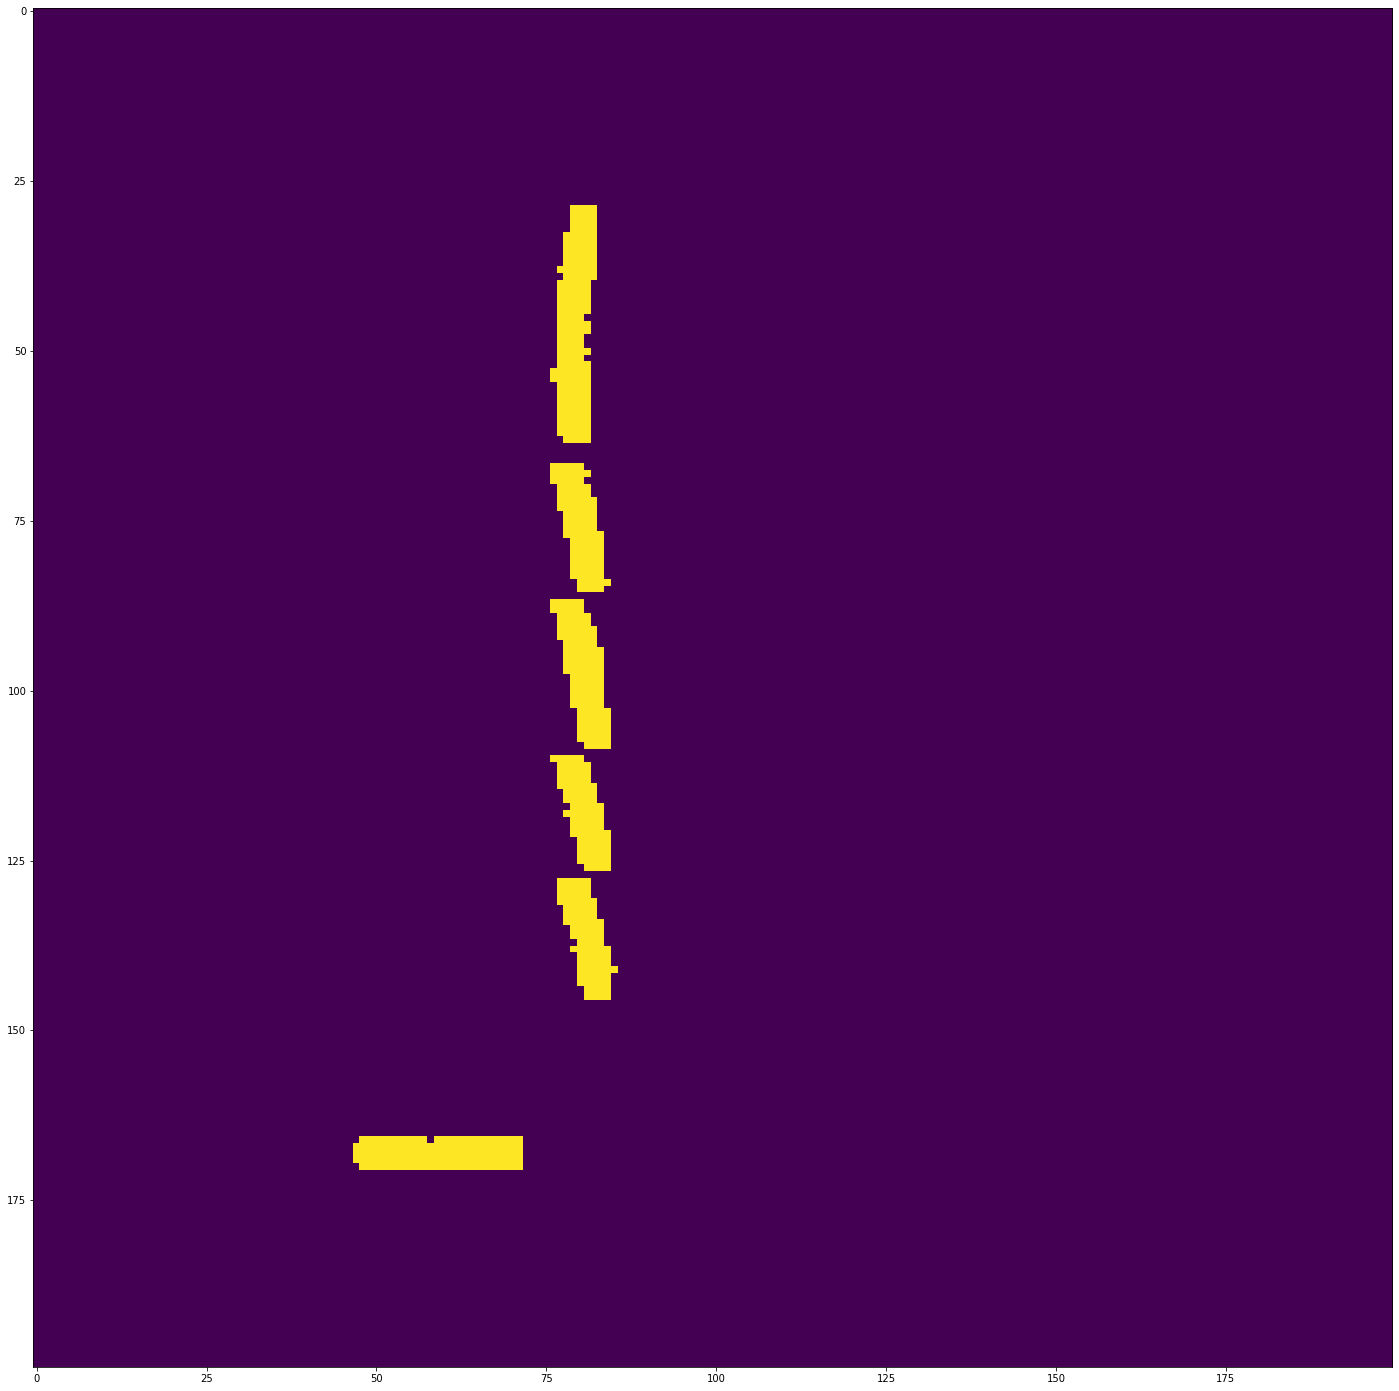

In [143]:
plt.figure(figsize=(45,25))
plt.imshow(segmented_cell_image[:,500:700])
